In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np
import time

In [ ]:
class MPCController:
    def __init__(self, num_tubes=3, pred_horizon=2):
        self.num_tubes = num_tubes
        self.pred_horizon = pred_horizon

    def nl_system_model(self, xk, uk):
        """MIMO nonlinear model of the system"""
        x4, x3, x2 = xk
        u4, u3, u2 = uk

        x4_next = 0.310 + 0.846 * x4 + -0.774 * u4 + 0.431 * u4**2 + 0.214 * x4**2 * u4 + -0.199 * x4 * u4**2
        x3_next = 0.819 + 0.891 * x3 + -3.255 * u3 + -0.281 * x3**2 + 0.918 * x3 * u3 + 0.258 * x3 * u2 + \
                  4.028 * u3**2 + -0.698 * x3**3 + 2.582 * x3**2 * u3 + -0.292 * x3**2 * u2 + -2.824 * x3 * u3**2 + -1.512 * u3**3
        x2_next = 0.402 + 1.088 * x2 + -0.724 * u2 + -1.052 * x2**2 + 0.072 * x2 * u2 + 0.583 * x2**3 + \
                  0.793 * x2**2 * u2 + -0.471 * x2 * u2**2 + 0.314 * u2**3

        x_next = np.array([x4_next, x3_next, x2_next])
        y_next = x_next

        return x_next, y_next

    def nl_mpc(self, xk, N, xk_sp):
        """MPC algorithm to determine optimal control actions"""
        umin = np.zeros(self.num_tubes)
        umax = np.ones(self.num_tubes)

        uk = np.zeros((N, self.num_tubes))

        for i in range(N):
            xk, _ = self.nl_system_model(xk, uk[i])
            uk[i], _ = self.optimize_control_action(xk, xk_sp, umin, umax)

        return uk

    def optimize_control_action(self, xk, xk_sp, umin, umax):
        """Optimization function to find the optimal control action"""
        # Implement your optimization algorithm here
        # This is just a placeholder
        uk_opt = np.ones(self.num_tubes) * 0.5
        cost = np.linalg.norm(xk - xk_sp)

        return uk_opt, cost

    def simulate(self, x0, setpoints):
        horizon = len(setpoints)
        x_history = np.zeros((horizon, self.num_tubes))
        u_history = np.zeros((horizon, self.num_tubes))

        x = x0.copy()
        for i in range(horizon):
            x_history[i] = x
            uk = setpoints[i]
            x, _ = self.nl_system_model(x, uk)
            u_history[i] = uk

        return x_history, u_history
        
        return x_history, u_history


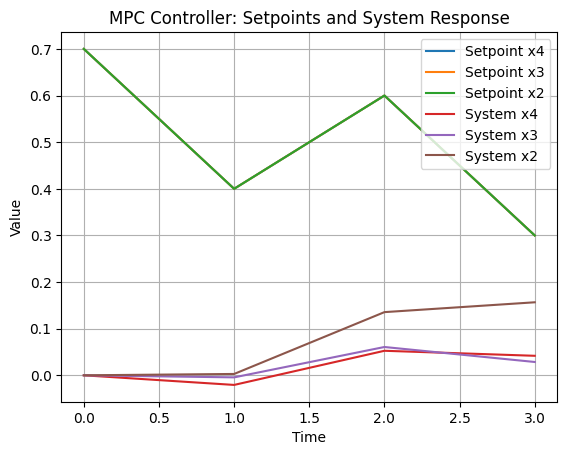

In [ ]:
x0 = np.array([0.0, 0.0, 0.0])
setpoints = np.array([[0.7, 0.7, 0.7],
[0.4, 0.4, 0.4],
[0.6, 0.6, 0.6],
[0.3, 0.3, 0.3]])

mpc = MPCController()

x_history, u_history = mpc.simulate(x0, setpoints)

time = np.arange(len(setpoints))
labels = ['x4', 'x3', 'x2']

for i in range(mpc.num_tubes):
  plt.plot(time, setpoints[:, i], label='Setpoint ' + labels[i])

for i in range(mpc.num_tubes):
  plt.plot(time, x_history[:, i], label='System ' + labels[i])

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('MPC Controller: Setpoints and System Response')
plt.legend()
plt.grid(True)
plt.show()

